In [2]:
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import gc
import matplotlib.pyplot as plt
import os
import pickle

In [40]:
columns = ['ip', 'channel', 'app', 'os', 'ioc_count', 'hour', 'ipdevice_count', 'nchannel_byip', 'ip_count',
           'appchannel_count', 'device', 'app_count', 'nhour_byipday', 'ipapp_count', 'napp_byido', 'napp_byip', 
          'didoa_pct', 'ndevice_byip', 'ido_count', 'ida_count', 'ipos_count', 'ido_pct', 'day', 'channel_count',
          'appos_count', 'os_count', 'nos_byipapp', 'iac_count', 'dido_first', 'appdevice_count']

In [41]:
len(columns)

30

In [5]:
training_set = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/training_set2.csv', usecols=columns, index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
gc.collect()

14

In [7]:
train_y = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/train_set_y.csv')

In [8]:
training_set['is_attributed'] = train_y['is_attributed'].values

In [8]:
training_set.shape

(65128309, 30)

In [15]:
training_set['is_attributed'].value_counts(normalize = True)

0    0.997539
1    0.002461
Name: is_attributed, dtype: float64

In [13]:
gc.collect()

0

In [11]:
training_set = training_set[training_set.hour!=12]

In [12]:
training_set = training_set[training_set.day == 8]

In [10]:
del train_y
gc.collect()

7

In [15]:
validation_set = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/validation_set.csv', usecols=columns, index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
validation_y = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/validation_set_y.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
validation_set['is_attributed'] = validation_y['is_attributed'].values

In [18]:
validation_set = validation_set[validation_set.hour != 12]

In [19]:
validation_set['is_attributed'].isnull().sum()

0

In [20]:
del validation_y
gc.collect()

28

In [21]:
data = training_set.append(validation_set)

In [24]:
gc.collect()

0

In [25]:
data = data.reset_index()

In [28]:
data.to_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/data_combine.csv')

In [29]:
gc.collect()

7

In [33]:
tv_set = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/new feature/training_set_feature/new_feature2.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [35]:
data.tail()

,ip,app,device,os,channel,day,hour,ip_count,app_count,os_count,...,ido_pct,didoa_pct,dido_first,napp_byip,ndevice_byip,nchannel_byip,nos_byipapp,napp_byido,nhour_byipday,is_attributed
61035358,24876,3,1,13,280,9,15,25324,20140673,25217207,...,0,0,1,72,23,135,56.0,38.0,9.0,0
61035359,51894,15,1,13,379,9,15,447,9126912,25217207,...,0,21456,1,29,6,80,12.0,15.0,9.0,0
61035360,292173,18,1,19,121,9,15,103,10574572,27651145,...,0,40005,1,19,1,47,4.0,16.0,9.0,0
61035361,103239,11,1,15,173,9,15,1861,2382074,2806507,...,26,0,0,39,8,90,13.0,17.0,9.0,0
61035362,90379,18,1,17,107,9,15,1270,10574572,6122178,...,440,440,0,35,7,88,21.0,13.0,9.0,0


In [47]:
tv_set.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'day', 'hour',
       'adc_nct', 'dh_nct', 'ladoc_nct', 'ido_nct', 'ipchannel_pct',
       'ido_app_cum', 'idoa_channel_cum', 'ip_os_cum'],
      dtype='object')

In [39]:
data.shape

(61035363, 31)

In [41]:
tv_set.shape

(61035363, 16)

In [42]:
data['adc_nct'] = tv_set['adc_nct'].values

In [43]:
data['dh_nct'] = tv_set['dh_nct'].values

In [44]:
data['ladoc_nct'] = tv_set['ladoc_nct'].values

In [46]:
data['ido_nct'] = tv_set['ido_nct'].values

In [48]:
data['ipchannel_pct'] = tv_set['ipchannel_pct'].values

In [49]:
gc.collect()

226

In [50]:
data['ido_app_cum'] = tv_set['ido_app_cum'].values

In [51]:
data['idoa_channel_cum'] = tv_set['idoa_channel_cum'].values

In [52]:
data['ip_os_cum'] = tv_set['ip_os_cum'].values

In [54]:
data.to_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/version2_tv.csv')

In [3]:
data = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/version2_tv.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
61035363 * 0.75

45776522.25

In [56]:
61035363 * 0.9

54931826.7

In [19]:
# training_set = data[0:45776522]

In [20]:
# validation_set = data[45776522:]

In [4]:
gc.collect()

14

In [4]:
training_set = data[0:45776522]

In [5]:
validation_set = data[45776522:]

In [7]:
del data
gc.collect()

0

In [22]:
predictors = ['ip', 'app', 'device', 'os', 'channel', 'day', 'hour', 'ip_count',
       'app_count', 'os_count', 'channel_count', 'ipapp_count',
       'ipdevice_count', 'ipos_count', 'appdevice_count', 'appchannel_count',
       'appos_count', 'ida_count', 'ido_count', 'ioc_count', 'iac_count',
       'ido_pct', 'didoa_pct', 'dido_first', 'napp_byip', 'ndevice_byip',
       'nchannel_byip', 'nos_byipapp', 'napp_byido', 'nhour_byipday',
       'adc_nct', 'dh_nct', 'ladoc_nct', 'ido_nct',
       'ipchannel_pct', 'ido_app_cum', 'idoa_channel_cum', 'ip_os_cum']

In [12]:
len(predictors)

38

In [13]:
target = 'is_attributed'

In [14]:
categorical =  ['ip','app', 'device', 'os', 'channel', 'hour']

In [15]:
xgtrain = lgb.Dataset(training_set[predictors].values, label=training_set[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical
                          )

In [23]:
gc.collect()

295

In [26]:
# del training_set
# gc.collect()

In [16]:
xgvalid = lgb.Dataset(validation_set[predictors].values, label=validation_set[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical
                          )

In [56]:
gc.collect()

0

In [27]:
# del validation_set
# gc.collect()

In [55]:
params = {
        'learning_rate': 0.10,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 7,  # 2^max_depth - 1
        'max_depth': 7,  # -1 means no limit
        'min_child_samples': 50,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':200 # because training data is extremely unbalanced 
    }

In [13]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate': 0.05,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
    }

lgb_params.update(params)

NameError: name 'params' is not defined

In [57]:
#  feval=None, early_stopping_rounds=50, num_boost_round=3000, verbose_eval=10

In [58]:
evals_results = {}

bst3 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[ xgvalid], 
                     valid_names=['valid'], 
                     evals_result=evals_results, 
                     num_boost_round=1000,
                     early_stopping_rounds=50,
                     verbose_eval=10, 
                     feval=None)

print("\nModel Report")
print("bst3.best_iteration: ", bst3.best_iteration)


LightGBMError: Cannot set categorical feature after freed raw data, set free_raw_data=False when construct Dataset to avoid this.

In [20]:
filename = 'model3_0707.sav'
pickle.dump(bst3, open(filename, 'wb'))

In [22]:
print('auc'+":", evals_results['valid']['auc'][bst3.best_iteration-1])

auc: 0.9847838452067837


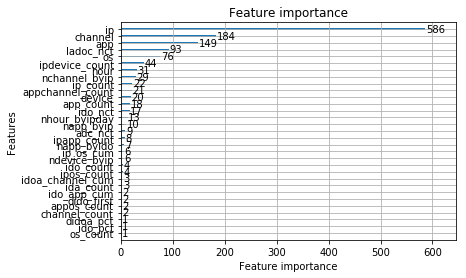

In [23]:
ax = lgb.plot_importance(bst3)
plt.show()

In [6]:
test_add = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/new feature/testing_set_feature/new_feature2.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [26]:
gc.collect()

253

In [7]:
test = pd.read_csv('/Users/mengruiyin/Dropbox/project3/project3_coding/test_set.csv', usecols=columns)

In [8]:
test_add.shape

(18790469, 16)

In [9]:
test.shape

(18790469, 30)

In [35]:
test_add.tail()

,ip,app,device,os,channel,click_time,day,hour,adc_nct,dh_nct,ladoc_nct,ido_nct,ipchannel_pct,ido_app_cum,idoa_channel_cum,ip_os_cum
118123123,99442,9,1,13,127,2017-11-10 15:00:00,10,15,0.0,0.0,0.0,0.0,16970.0,76,6,202
118123124,88046,23,1,37,153,2017-11-10 15:00:00,10,15,0.0,0.0,0.0,0.0,818.0,274,10,6497
118123125,81398,18,1,17,265,2017-11-10 15:00:00,10,15,0.0,0.0,0.0,0.0,0.0,428,45,6766
118123126,123236,27,1,13,122,2017-11-10 15:00:00,10,15,0.0,0.0,0.0,0.0,38405.0,167,0,632
118123127,73516,12,2,27,265,2017-11-10 15:00:00,10,15,0.0,0.0,0.0,0.0,14.0,1397,401,507837


In [36]:
test.tail()

,ip,app,device,os,channel,day,hour,ip_count,app_count,os_count,...,iac_count,ido_pct,didoa_pct,dido_first,napp_byip,ndevice_byip,nchannel_byip,nos_byipapp,napp_byido,nhour_byipday
18790464,99442,9,1,13,127,10,15,203,12038408,25217207,...,5,0,1305,1,26,3,62,5,21,7
18790465,88046,23,1,37,153,10,15,6498,1726178,1913734,...,146,4,36822,0,53,13,99,27,20,7
18790466,81398,18,1,17,265,10,15,6767,10574572,6122178,...,13,0,0,1,51,10,104,37,21,7
18790467,123236,27,1,13,122,10,15,633,833234,25217207,...,1,1,0,0,28,3,75,2,23,7
18790468,73516,12,2,27,265,10,15,507838,15354281,1171571,...,11440,564,564,0,173,128,140,132,21,9


In [28]:
gc.collect()

103

In [31]:
test_add.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'day', 'hour',
       'adc_nct', 'dh_nct', 'ladoc_nct', 'ido_nct', 'ipchannel_pct',
       'ido_app_cum', 'idoa_channel_cum', 'ip_os_cum'],
      dtype='object')

In [10]:
test['adc_nct'] = test_add['adc_nct'].values

In [11]:
gc.collect()

116

In [12]:
test['dh_nct'] = test_add['dh_nct'].values

In [13]:
gc.collect()

7

In [14]:
test['ladoc_nct'] = test_add['ladoc_nct'].values
gc.collect()

7

In [15]:
test['ido_nct'] = test_add['ido_nct'].values
gc.collect()

7

In [16]:
test['ipchannel_pct'] = test_add['ipchannel_pct'].values
gc.collect()

7

In [17]:
test['ido_app_cum'] = test_add['ido_app_cum'].values
gc.collect()

7

In [18]:
test['idoa_channel_cum'] = test_add['idoa_channel_cum'].values
gc.collect()

7

In [19]:
test['ip_os_cum'] = test_add['ip_os_cum'].values
gc.collect()

7

In [20]:
test.shape

(18790469, 38)

In [66]:
prediction3 = pd.read_csv('test_id.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [67]:
gc.collect()

7

In [69]:
test.shape

(18790469, 38)

In [72]:
bst3 = pickle.load(open('model3_0707.sav', 'rb'))

In [73]:
prediction3['is_attributed'] = bst3.predict(test[predictors],num_iteration=bst3.best_iteration)

In [76]:
prediction3

,click_id,is_attributed
0,0,0.052339
1,1,0.086406
2,2,0.008018
3,3,0.037363
4,4,0.014720
5,5,0.102579
6,6,0.014029
7,7,0.092509
8,9,0.055221
9,8,0.006798


In [48]:
prediction4.shape

(18790469, 2)

In [54]:
prediction3.to_csv('prediction3_0707.csv', index = False)

In [15]:
params = {
        'learning_rate': 0.10,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 7,  # 2^max_depth - 1
        'max_depth': 3,  # -1 means no limit
        'min_child_samples': 50,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':200 # because training data is extremely unbalanced 
    }

In [16]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate': 0.05,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
    }

lgb_params.update(params)

In [17]:
evals_results = {}

bst4 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[ xgvalid], 
                     valid_names=['valid'], 
                     evals_result=evals_results, 
                     num_boost_round=1000,
                     early_stopping_rounds=50,
                     verbose_eval=10, 
                     feval=None)

print("\nModel Report")
print("bst4.best_iteration: ", bst4.best_iteration)


/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[10]	valid's auc: 0.970734
[20]	valid's auc: 0.973478
[30]	valid's auc: 0.976422
[40]	valid's auc: 0.977664
[50]	valid's auc: 0.979135
[60]	valid's auc: 0.980183
[70]	valid's auc: 0.981347
[80]	valid's auc: 0.981959
[90]	valid's auc: 0.982563
[100]	valid's auc: 0.982858
[110]	valid's auc: 0.983209
[120]	valid's auc: 0.983434
[130]	valid's auc: 0.983624
[140]	valid's auc: 0.983834
[150]	valid's auc: 0.983947
[160]	valid's auc: 0.984087
[170]	valid's auc: 0.98422
[180]	valid's auc: 0.984256
[190]	valid's auc: 0.984281
[200]	valid's auc: 0.984322
[210]	valid's auc: 0.984381
[220]	valid's auc: 0.984392
[230]	valid's auc: 0.984531
[240]	valid's auc: 0.984539
[250]	valid's auc: 0.984591
[260]	valid's auc: 0.984621
[270]	valid's auc: 0.98462
[280]	valid's auc: 0.984624
[290]	valid's auc: 0.984643
[300]	valid's auc: 0.984684
[310]	valid's auc: 0.984696
[320]	valid's auc: 0.984685
[330]	valid's auc: 0.984677
[340]	valid's auc: 0.9846

In [18]:
filename = 'model4_0707.sav'
pickle.dump(bst4, open(filename, 'wb'))

In [19]:
print('auc'+":", evals_results['valid']['auc'][bst4.best_iteration-1])

auc: 0.9848123177902867


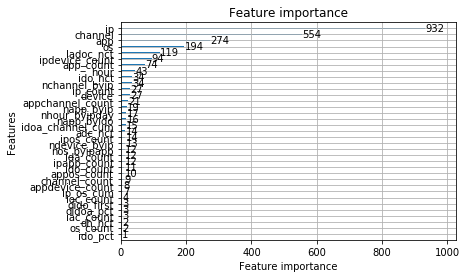

In [21]:
ax = lgb.plot_importance(bst4)
plt.show()

In [49]:
prediction4 = pd.read_csv('test_id.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [53]:
prediction4['is_attributed'] = bst4.predict(test[predictors],num_iteration=bst4.best_iteration)

In [54]:
prediction4.head()

,click_id,is_attributed
0,0,0.077840
1,1,0.058290
2,2,0.038598
3,3,0.058440
4,4,0.032954


In [55]:
prediction4.to_csv('prediction4_0707.csv', index = False)

In [51]:
params = {
        'learning_rate': 0.10,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 32,  # 2^max_depth - 1
        'max_depth': 10,  # -1 means no limit
        'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':200 # because training data is extremely unbalanced 
    }

In [52]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate': 0.05,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
    }

lgb_params.update(params)

In [28]:
evals_results = {}

bst5 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[ xgvalid], 
                     valid_names=['valid'], 
                     evals_result=evals_results, 
                     num_boost_round=1000,
                     early_stopping_rounds=50,
                     verbose_eval=10, 
                     feval=None)

print("\nModel Report")
print("bst5.best_iteration: ", bst5.best_iteration)

/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[10]	valid's auc: 0.97018
[20]	valid's auc: 0.974352
[30]	valid's auc: 0.976548
[40]	valid's auc: 0.978519
[50]	valid's auc: 0.979796
[60]	valid's auc: 0.980779
[70]	valid's auc: 0.981796
[80]	valid's auc: 0.982574
[90]	valid's auc: 0.983086
[100]	valid's auc: 0.983356
[110]	valid's auc: 0.983659
[120]	valid's auc: 0.983839
[130]	valid's auc: 0.984013
[140]	valid's auc: 0.984074
[150]	valid's auc: 0.98415
[160]	valid's auc: 0.984322
[170]	valid's auc: 0.984376
[180]	valid's auc: 0.984378
[190]	valid's auc: 0.984426
[200]	valid's auc: 0.984507
[210]	valid's auc: 0.984559
[220]	valid's auc: 0.984605
[230]	valid's auc: 0.984693
[240]	valid's auc: 0.984647
[250]	valid's auc: 0.984665
[260]	valid's auc: 0.984659
[270]	valid's auc: 0.984674
Early stopping, best iteration is:
[229]	valid's auc: 0.984698

Model Report
bst5.best_iteration:  229


In [29]:
prediction5 = pd.read_csv('test_id.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [48]:
prediction5['is_attributed'] = bst5.predict(test[predictors],num_iteration=bst5.best_iteration)

In [49]:
prediction5.head()

,click_id,is_attributed
0,0,0.067497
1,1,0.089762
2,2,0.036516
3,3,0.055730
4,4,0.032559


In [50]:
prediction5.to_csv('prediction5.csv', index = False)

In [16]:
params = {
        'learning_rate': 0.10,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 32,  # 2^max_depth - 1
        'max_depth': 7,  # -1 means no limit
        'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':200 # because training data is extremely unbalanced 
    }

In [17]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate': 0.05,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
    }

lgb_params.update(params)

In [18]:
evals_results = {}

bst6 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[ xgvalid], 
                     valid_names=['valid'], 
                     evals_result=evals_results, 
                     num_boost_round=1000,
                     early_stopping_rounds=50,
                     verbose_eval=10, 
                     feval=None)

print("\nModel Report")
print("bst6.best_iteration: ", bst6.best_iteration)

/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[10]	valid's auc: 0.97115
[20]	valid's auc: 0.972812
[30]	valid's auc: 0.974654
[40]	valid's auc: 0.976758
[50]	valid's auc: 0.978185
[60]	valid's auc: 0.979056
[70]	valid's auc: 0.979848
[80]	valid's auc: 0.980123
[90]	valid's auc: 0.980332
[100]	valid's auc: 0.980467
[110]	valid's auc: 0.980632
[120]	valid's auc: 0.980599
[130]	valid's auc: 0.980665
[140]	valid's auc: 0.98063
[150]	valid's auc: 0.980656
[160]	valid's auc: 0.98079
[170]	valid's auc: 0.980771
[180]	valid's auc: 0.980754
[190]	valid's auc: 0.980715
[200]	valid's auc: 0.980675
[210]	valid's auc: 0.980737
Early stopping, best iteration is:
[165]	valid's auc: 0.980807

Model Report
bst6.best_iteration:  165


In [19]:
filename = 'model6.sav'
pickle.dump(bst6, open(filename, 'wb'))

In [20]:
print('auc'+":", evals_results['valid']['auc'][bst6.best_iteration-1])

auc: 0.980806841462664


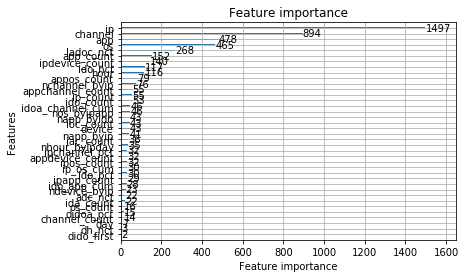

In [21]:
ax = lgb.plot_importance(bst6)
plt.show()

In [43]:
prediction6 = pd.read_csv('test_id.csv', index_col = 0)
prediction6['is_attributed'] = bst6.predict(test[predictors],num_iteration=bst6.best_iteration)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [44]:
prediction6['is_attributed'] = bst6.predict(test[predictors],num_iteration=bst6.best_iteration)

In [71]:
prediction6[prediction6.click_id == 369]

,click_id,is_attributed
369,369,0.745613


In [49]:
prediction6.to_csv('prediction6.csv', index = False)

In [83]:
len(predictors)

38

In [17]:
params = {
        'learning_rate': 0.10,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 32,  # 2^max_depth - 1
        'max_depth': 5,  # -1 means no limit
        'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':200 # because training data is extremely unbalanced 
    }

In [18]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate': 0.05,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
    }

lgb_params.update(params)

In [19]:
evals_results = {}

bst7 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[ xgvalid], 
                     valid_names=['valid'], 
                     evals_result=evals_results, 
                     num_boost_round=1000,
                     early_stopping_rounds=50,
                     verbose_eval=10, 
                     feval=None)

print("\nModel Report")
print("bst7.best_iteration: ", bst7.best_iteration)

/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[10]	valid's auc: 0.968515
[20]	valid's auc: 0.971855
[30]	valid's auc: 0.973266
[40]	valid's auc: 0.975219
[50]	valid's auc: 0.977005
[60]	valid's auc: 0.97822
[70]	valid's auc: 0.978939
[80]	valid's auc: 0.979317
[90]	valid's auc: 0.9796
[100]	valid's auc: 0.979839
[110]	valid's auc: 0.979955
[120]	valid's auc: 0.97997
[130]	valid's auc: 0.980159
[140]	valid's auc: 0.980126
[150]	valid's auc: 0.980093
[160]	valid's auc: 0.980293
[170]	valid's auc: 0.980282
[180]	valid's auc: 0.980296
[190]	valid's auc: 0.980295
[200]	valid's auc: 0.980304
[210]	valid's auc: 0.980389
[220]	valid's auc: 0.980438
[230]	valid's auc: 0.980449
[240]	valid's auc: 0.98042
[250]	valid's auc: 0.980418
[260]	valid's auc: 0.980396
[270]	valid's auc: 0.980378
[280]	valid's auc: 0.980465
[290]	valid's auc: 0.980527
[300]	valid's auc: 0.980566
[310]	valid's auc: 0.980596
[320]	valid's auc: 0.980565
[330]	valid's auc: 0.980541
[340]	valid's auc: 0.980523


##### the auc score for the the validation set was 0.980598, which was much higher than the previous two models!

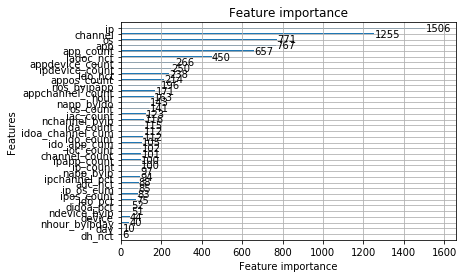

In [37]:
ax = lgb.plot_importance(bst7, max_num_features=300)
plt.show()

In [21]:
filename = 'model7_new.sav'
pickle.dump(bst7, open(filename, 'wb'))

In [3]:
bst7 = pickle.load(open('model7_new.sav', 'rb'))

In [5]:
feature_importance = {}
for i in range(len(bst7.feature_importance())):
    feature_importance[bst7.feature_name()[i]] = bst7.feature_importance()[i]

In [6]:
feature_importance

{'ip': 1506,
 'app': 767,
 'device': 44,
 'os': 771,
 'channel': 1255,
 'day': 10,
 'hour': 163,
 'ip_count': 100,
 'app_count': 657,
 'os_count': 141,
 'channel_count': 101,
 'ipapp_count': 100,
 'ipdevice_count': 250,
 'ipos_count': 83,
 'appdevice_count': 266,
 'appchannel_count': 171,
 'appos_count': 214,
 'ida_count': 115,
 'ido_count': 112,
 'ioc_count': 102,
 'iac_count': 123,
 'ido_pct': 75,
 'didoa_pct': 52,
 'dido_first': 0,
 'napp_byip': 97,
 'ndevice_byip': 51,
 'nchannel_byip': 116,
 'nos_byipapp': 196,
 'napp_byido': 143,
 'nhour_byipday': 40,
 'adc_nct': 88,
 'dh_nct': 6,
 'ladoc_nct': 450,
 'ido_nct': 238,
 'ipchannel_pct': 94,
 'ido_app_cum': 105,
 'idoa_channel_cum': 112,
 'ip_os_cum': 85}

Only one feature: dido_first wasn't helpful in the model. All other features had large importance values. 

In [23]:
prediction7 = pd.read_csv('test_id.csv', index_col = 0)
prediction7['is_attributed'] = bst7.predict(test[predictors],num_iteration=bst7.best_iteration)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [26]:
prediction7.to_csv('prediction7_new.csv', index = False)

In [8]:
predictors2 = ['app', 'device', 'os', 'channel', 'day', 'hour', 'ip_count',
       'app_count', 'os_count', 'channel_count', 'ipapp_count',
       'ipdevice_count', 'ipos_count', 'appdevice_count', 'appchannel_count',
       'appos_count', 'ida_count', 'ido_count', 'ioc_count', 'iac_count',
       'ido_pct', 'didoa_pct', 'dido_first', 'napp_byip', 'ndevice_byip',
       'nchannel_byip', 'nos_byipapp', 'napp_byido', 'nhour_byipday',
       'adc_nct', 'dh_nct', 'ladoc_nct', 'ido_nct',
       'ipchannel_pct', 'ido_app_cum', 'idoa_channel_cum', 'ip_os_cum']

In [ ]:
target = 'is_attributed'

In [16]:
categorical2 =  ['app', 'device', 'os', 'channel', 'hour']

In [14]:
xgtrain2 = lgb.Dataset(training_set[predictors2].values, label=training_set[target].values,
                          feature_name=predictors2,
                          categorical_feature=categorical2
                          )

In [17]:
xgvalid2 = lgb.Dataset(validation_set[predictors2].values, label=validation_set[target].values,
                          feature_name=predictors2,
                          categorical_feature=categorical2
                          )

In [3]:
# bst7 = pickle.load(open('model7.sav', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'model7.sav'

##### the auc score for the prediction was 0.9723249! So the new features were helpful!

##### I deleted feature ip for the next model since most of features were created based on ip, so I believe these features have provided enough information about ip. 

In [19]:
params = {
        'learning_rate': 0.10,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 32,  # 2^max_depth - 1
        'max_depth': 5,  # -1 means no limit
        'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':200 # because training data is extremely unbalanced 
    }

In [20]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate': 0.05,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
    }

lgb_params.update(params)

In [21]:
evals_results = {}

bst8 = lgb.train(lgb_params, 
                     xgtrain2, 
                     valid_sets=[ xgvalid2], 
                     valid_names=['valid'], 
                     evals_result=evals_results, 
                     num_boost_round=1000,
                     early_stopping_rounds=50,
                     verbose_eval=10, 
                     feval=None)

print("\nModel Report")
print("bst8.best_iteration: ", bst8.best_iteration)

/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mengruiyin/LightGBM/python-package/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[10]	valid's auc: 0.968581
[20]	valid's auc: 0.972588
[30]	valid's auc: 0.974533
[40]	valid's auc: 0.976219
[50]	valid's auc: 0.977758
[60]	valid's auc: 0.979116
[70]	valid's auc: 0.97991
[80]	valid's auc: 0.980388
[90]	valid's auc: 0.980712
[100]	valid's auc: 0.980963
[110]	valid's auc: 0.981089
[120]	valid's auc: 0.981214
[130]	valid's auc: 0.981294
[140]	valid's auc: 0.981425
[150]	valid's auc: 0.98147
[160]	valid's auc: 0.981515
[170]	valid's auc: 0.981554
[180]	valid's auc: 0.981577
[190]	valid's auc: 0.981636
[200]	valid's auc: 0.981646
[210]	valid's auc: 0.981653
[220]	valid's auc: 0.981668
[230]	valid's auc: 0.981718
[240]	valid's auc: 0.981683
[250]	valid's auc: 0.981704
[260]	valid's auc: 0.981726
[270]	valid's auc: 0.981727
[280]	valid's auc: 0.981726
[290]	valid's auc: 0.981678
[300]	valid's auc: 0.981662
Early stopping, best iteration is:
[258]	valid's auc: 0.981743

Model Report
bst8.best_iteration:  258


##### the auc score for the validation set was 0.981753. 

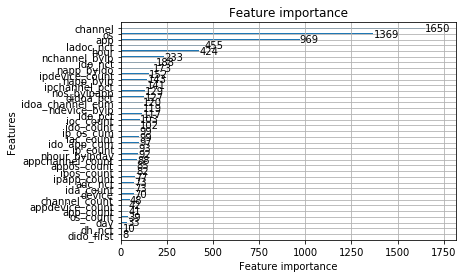

In [22]:
ax = lgb.plot_importance(bst8, max_num_features=300)
plt.show()

In [41]:
prediction8 = pd.read_csv('test_id.csv', index_col = 0)
prediction8['is_attributed'] = bst8.predict(test[predictors2],num_iteration=bst8.best_iteration)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [77]:
prediction8 = pd.read_csv('test_id.csv', index_col = 0)
prediction8['is_attributed'] = bst8.predict(test[predictors2],num_iteration=bst8.best_iteration)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [45]:
prediction8.to_csv('prediction8.csv', index = False)

In [81]:
prediction8.to_csv('prediction8_new.csv', index = False)

In [53]:
test_org = pd.read_csv('/Users/mengruiyin/Dropbox/project3/test.csv')

KeyboardInterrupt: 

##### the auc score for the prediction was 0.9734109, a liitle better than the model with ip addresses. 

##### for further improvement: 
* the feature 'dido_first' was useless, so I would try to create other features to replace it. 